- Continuous: [0, 1], 0.0001, 001 --> measurable
- Discrete: [0, 6] -> 0, 1, 2, 3, 4, 5, 6 --> countable

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
data = load_boston()

In [5]:
columns = data.get('feature_names')

In [11]:
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [12]:
df = pd.DataFrame(data.get('data'), columns=columns)
df['label'] = data.get('target')
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,label
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
label      0
dtype: int64

In [14]:
df.duplicated().sum()

0

**Pearson correlation**

[-1, 1]

-1: absolute negative correlation

1 : absolute positive corraltion

0: No correlation

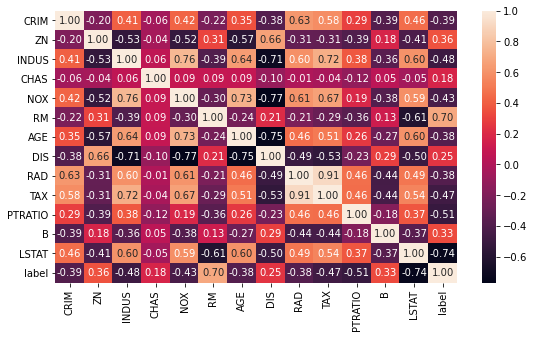

In [17]:
plt.figure(figsize=(9, 5))
sns.heatmap(df.corr(), annot=True, fmt='.2f');

In [18]:
df_final = df.drop(columns='TAX')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_final.drop(columns='label'), df_final.label, 
                                                   shuffle=True, test_size=0.2)

In [20]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
413,28.65580,0.0,18.10,0.0,0.5970,5.155,100.0,1.5894,24.0,20.2,210.97,20.08
5,0.02985,0.0,2.18,0.0,0.4580,6.430,58.7,6.0622,3.0,18.7,394.12,5.21
118,0.13058,0.0,10.01,0.0,0.5470,5.872,73.1,2.4775,6.0,17.8,338.63,15.37
12,0.09378,12.5,7.87,0.0,0.5240,5.889,39.0,5.4509,5.0,15.2,390.50,15.71
427,37.66190,0.0,18.10,0.0,0.6790,6.202,78.7,1.8629,24.0,20.2,18.82,14.52
...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,14.7,392.78,3.81
180,0.06588,0.0,2.46,0.0,0.4880,7.765,83.3,2.7410,3.0,17.8,395.56,7.56
2,0.02729,0.0,7.07,0.0,0.4690,7.185,61.1,4.9671,2.0,17.8,392.83,4.03
498,0.23912,0.0,9.69,0.0,0.5850,6.019,65.3,2.4091,6.0,19.2,396.90,12.92


In [21]:
y_train

413    16.3
5      28.7
118    20.4
12     21.7
427    10.9
       ... 
203    48.5
180    39.8
2      34.7
498    21.2
179    37.2
Name: label, Length: 404, dtype: float64